In [ ]:
import pandas as pd

df = pd.read_csv('train_data.csv')

print(df)

        event_id  time_to_tca  mission_id       risk  max_risk_estimate  \
0              0     1.566798           5 -10.204955          -7.834756   
1              0     1.207494           5 -10.355758          -7.848937   
2              0     0.952193           5 -10.345631          -7.847406   
3              0     0.579669           5 -10.337809          -7.845880   
4              0     0.257806           5 -10.391260          -7.852942   
...          ...          ...         ...        ...                ...   
162629     13153     3.029751           1  -7.108630          -5.142668   
162630     13153     2.799253           1  -7.070070          -5.137869   
162631     13153     2.385399           1  -7.066209          -5.137034   
162632     13153     2.043339           1  -7.028307          -5.131297   
162633     13153     1.618095           1  -7.172372          -5.152181   

        max_risk_scaling  miss_distance  relative_speed  relative_position_r  \
0               8.6

In [ ]:
grouped_by_event = df.groupby('event_id')
for x in range(0,30):
  print(f'Number of CDMs: {x}   Number of events: {(grouped_by_event.size() == x).sum()}')


Number of CDMs: 0   Number of events: 0
Number of CDMs: 1   Number of events: 225
Number of CDMs: 2   Number of events: 1198
Number of CDMs: 3   Number of events: 1006
Number of CDMs: 4   Number of events: 729
Number of CDMs: 5   Number of events: 596
Number of CDMs: 6   Number of events: 619
Number of CDMs: 7   Number of events: 588
Number of CDMs: 8   Number of events: 321
Number of CDMs: 9   Number of events: 376
Number of CDMs: 10   Number of events: 319
Number of CDMs: 11   Number of events: 291
Number of CDMs: 12   Number of events: 299
Number of CDMs: 13   Number of events: 281
Number of CDMs: 14   Number of events: 277
Number of CDMs: 15   Number of events: 271
Number of CDMs: 16   Number of events: 248
Number of CDMs: 17   Number of events: 215
Number of CDMs: 18   Number of events: 245
Number of CDMs: 19   Number of events: 494
Number of CDMs: 20   Number of events: 1551
Number of CDMs: 21   Number of events: 2810
Number of CDMs: 22   Number of events: 192
Number of CDMs: 23 

(54356, 103)

In [ ]:
# Check for null values in each column
null_counts = df.isnull().sum()

# Display columns with null values
columns_with_nulls = null_counts[null_counts > 0]
print("Columns with null values:")
print(columns_with_nulls)

# Optionally, display the percentage of nulls in each column
null_percentages = (columns_with_nulls / len(df)) * 100
print("\nPercentage of null values in each column:")
print(null_percentages)


Columns with null values:
t_rcs_estimate            3277
t_crdot_r                 9230
t_crdot_t                 9230
t_crdot_n                 9230
t_ctdot_r                 9230
t_ctdot_t                 9230
t_ctdot_n                 9230
t_ctdot_rdot              9230
t_cndot_r                 9230
t_cndot_t                 9230
t_cndot_n                 9230
t_cndot_rdot              9230
t_cndot_tdot              9230
c_time_lastob_start         11
c_time_lastob_end           11
c_recommended_od_span       11
c_actual_od_span            11
c_obs_available             11
c_obs_used                  11
c_residuals_accepted        11
c_weighted_rms              11
c_rcs_estimate           52841
c_ct_r                      11
c_cn_r                      11
c_cn_t                      11
c_crdot_r                 9241
c_crdot_t                 9241
c_crdot_n                 9241
c_ctdot_r                 9241
c_ctdot_t                 9241
c_ctdot_n                 9241
c_ctdot_rdot 

In [ ]:
df_cleaned = df.dropna()

# Display the number of rows before and after cleaning
print(f"Number of rows before cleaning: {len(df)}")
print(f"Number of rows after cleaning: {len(df_cleaned)}")


Number of rows before cleaning: 162634
Number of rows after cleaning: 97450


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.106570 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 22822
[LightGBM] [Info] Number of data points in the train set: 77960, number of used features: 99
[LightGBM] [Info] Start training from score -20.053561


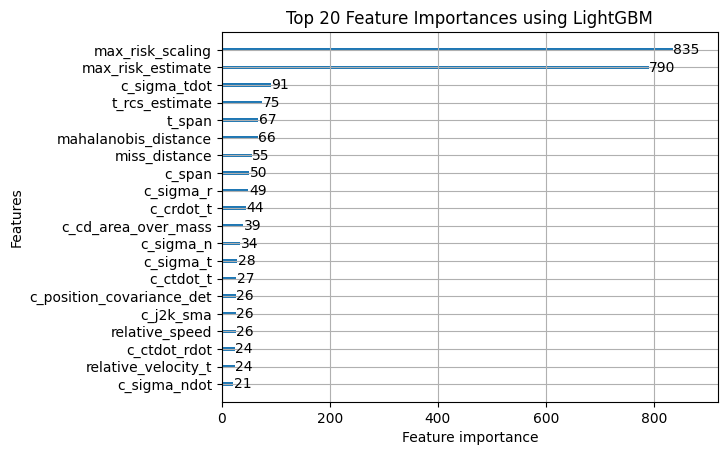

In [ ]:
#These are the features generated after dropping any rows that that have na values.
import lightgbm as lgb
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Define features and target
X_remove_na = df_cleaned.drop(columns=['event_id', 'mission_id', 'risk', 'c_object_type'])  # Exclude identifier columns and the target
y_remove_na = df_cleaned['risk']

# Split data into training and testing sets
X_train_remove_na, X_test_remove_na, y_train_remove_na, y_test_remove_na = train_test_split(X_remove_na, y_remove_na, test_size=0.2, random_state=42)

# Initialize and train the LightGBM regressor
lgb_model_remove_na = lgb.LGBMRegressor(random_state=42)
lgb_model_remove_na.fit(X_train_remove_na, y_train_remove_na)

# Plot feature importance
lgb.plot_importance(lgb_model_remove_na, max_num_features=20)  # Show top 20 features for clarity
plt.title("Top 20 Feature Importances using LightGBM")
plt.show()


In [ ]:
# Forward fill missing values
df_filled = df.fillna(method='ffill')

# Display the number of remaining nulls (if any)
null_counts = df_filled.isnull().sum()
print("Remaining null values after forward filling:")
print(null_counts)


<ipython-input-6-20da7cc0b3c0>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filled = df.fillna(method='ffill')


Remaining null values after forward filling:
event_id             0
time_to_tca          0
mission_id           0
risk                 0
max_risk_estimate    0
                    ..
c_sigma_ndot         0
F10                  0
F3M                  0
SSN                  0
AP                   0
Length: 103, dtype: int64


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.156400 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 23023
[LightGBM] [Info] Number of data points in the train set: 130107, number of used features: 99
[LightGBM] [Info] Start training from score -19.327581


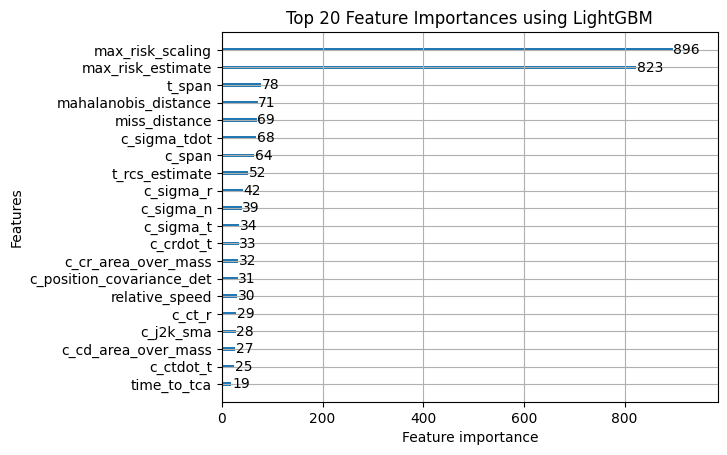

In [ ]:
#These are the features generated after doing forward fill on na values.
import lightgbm as lgb
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Define features and target
X_forward_fill = df_filled.drop(columns=['event_id', 'mission_id', 'risk', 'c_object_type'])  # Exclude identifier columns and the target
y_forward_fill = df_filled['risk']

# Split data into training and testing sets
X_train_forward_fill, X_test_forward_fill, y_train_forward_fill, y_test_forward_fill = train_test_split(X_forward_fill, y_forward_fill, test_size=0.2, random_state=42)

# Initialize and train the LightGBM regressor
lgb_model_forward_fill = lgb.LGBMRegressor(random_state=42)
lgb_model_forward_fill.fit(X_train_forward_fill, y_train_forward_fill)

# Plot feature importance
lgb.plot_importance(lgb_model_forward_fill, max_num_features=20)  # Show top 20 features for clarity
plt.title("Top 20 Feature Importances using LightGBM")
plt.show()

In [ ]:
# Forward fill missing values
df_bfilled = df.fillna(method='bfill')

# Display the number of remaining nulls (if any)
null_counts = df_bfilled.isnull().sum()
print("Remaining null values after forward filling:")
print(null_counts)


<ipython-input-8-81b3a1fdec89>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_bfilled = df.fillna(method='bfill')


Remaining null values after forward filling:
event_id             0
time_to_tca          0
mission_id           0
risk                 0
max_risk_estimate    0
                    ..
c_sigma_ndot         0
F10                  0
F3M                  0
SSN                  0
AP                   0
Length: 103, dtype: int64


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.156164 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 23023
[LightGBM] [Info] Number of data points in the train set: 130107, number of used features: 99
[LightGBM] [Info] Start training from score -19.327581


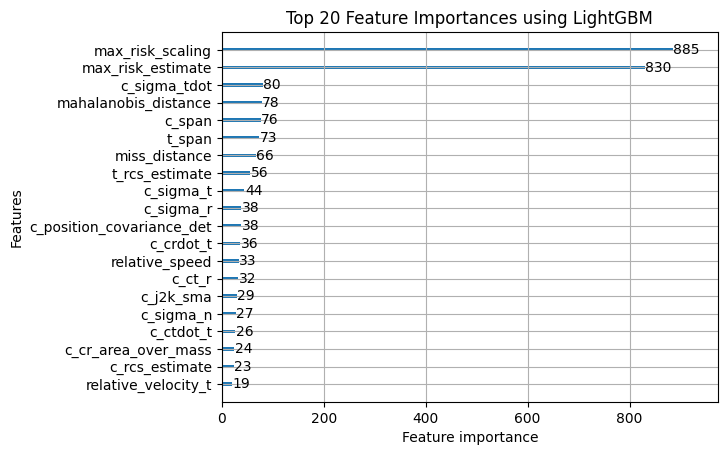

In [ ]:
#These are the features generated after doing backward fill on na values.
import lightgbm as lgb
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Define features and target
X_backward_fill = df_bfilled.drop(columns=['event_id', 'mission_id', 'risk', 'c_object_type'])  # Exclude identifier columns and the target
y_backward_fill = df_bfilled['risk']

# Split data into training and testing sets
X_train_backward_fill, X_test_backward_fill, y_train_backward_fill, y_test_backward_fill = train_test_split(X_backward_fill, y_backward_fill, test_size=0.2, random_state=42)

# Initialize and train the LightGBM regressor
lgb_model_backward_fill = lgb.LGBMRegressor(random_state=42)
lgb_model_backward_fill.fit(X_train_backward_fill, y_train_backward_fill)

# Plot feature importance
lgb.plot_importance(lgb_model_backward_fill, max_num_features=20)  # Show top 20 features for clarity
plt.title("Top 20 Feature Importances using LightGBM")
plt.show()

In [ ]:
# Get feature importances for each model
def get_top_features(model, X, num_features=20):
    feature_importance = pd.DataFrame({
        'Feature': X.columns,
        'Importance': model.feature_importances_
    }).sort_values(by='Importance', ascending=False)
    return feature_importance.head(num_features)['Feature'].tolist()

# Get top 20 features for each model
top_features_remove_na = get_top_features(lgb_model_remove_na, X_remove_na)
top_features_forward_fill = get_top_features(lgb_model_forward_fill, X_forward_fill)
top_features_backward_fill = get_top_features(lgb_model_backward_fill, X_backward_fill)

# Find common features across all three models
common_features = set(top_features_remove_na) & set(top_features_forward_fill) & set(top_features_backward_fill)

# Display the results
print(f"Top 20 features from model with NA rows removed: {top_features_remove_na}")
print(f"Top 20 features from model with forward fill: {top_features_forward_fill}")
print(f"Top 20 features from model with backward fill: {top_features_backward_fill}")
print(f"\nCommon features across all three models: {common_features}")


Top 20 features from model with NA rows removed: ['max_risk_scaling', 'max_risk_estimate', 'c_sigma_tdot', 't_rcs_estimate', 't_span', 'mahalanobis_distance', 'miss_distance', 'c_span', 'c_sigma_r', 'c_crdot_t', 'c_cd_area_over_mass', 'c_sigma_n', 'c_sigma_t', 'c_ctdot_t', 'c_j2k_sma', 'c_position_covariance_det', 'relative_speed', 'c_ctdot_rdot', 'relative_velocity_t', 'c_rcs_estimate']
Top 20 features from model with forward fill: ['max_risk_scaling', 'max_risk_estimate', 't_span', 'mahalanobis_distance', 'miss_distance', 'c_sigma_tdot', 'c_span', 't_rcs_estimate', 'c_sigma_r', 'c_sigma_n', 'c_sigma_t', 'c_crdot_t', 'c_cr_area_over_mass', 'c_position_covariance_det', 'relative_speed', 'c_ct_r', 'c_j2k_sma', 'c_cd_area_over_mass', 'c_ctdot_t', 'time_to_tca']
Top 20 features from model with backward fill: ['max_risk_scaling', 'max_risk_estimate', 'c_sigma_tdot', 'mahalanobis_distance', 'c_span', 't_span', 'miss_distance', 't_rcs_estimate', 'c_sigma_t', 'c_sigma_r', 'c_position_covarian

Results from dropping na rows and backward fill are very similar. Only the forward fill method picked up time_to_tca, which is odd. That was expected to be included on the list for all methods.

In [ ]:
import numpy as np

# Check for infinity or very large values in the dataset
print("Checking for infinity values...")
print((~np.isfinite(X_train_remove_na)).sum().sum())
print((~np.isfinite(y_train_remove_na)).sum().sum())

Checking for infinity values...
0
0


In [ ]:
display(X_train_remove_na['t_position_covariance_det'].max())
X_train_remove_na = X_train_remove_na.astype(np.float64)
X_test_remove_na = X_test_remove_na.astype(np.float64)
y_train_remove_na = y_train_remove_na.astype(np.float64)
y_test_remove_na = y_test_remove_na.astype(np.float64)
print(X_train_remove_na.isna().sum().sum())
print(y_train_remove_na.isna().sum().sum())


6.732289373602052e+46

0
0


In [ ]:
#Use recursive feature elimination on a RandomForestRegressor model to see which features are selected.
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split


estimator_remove_na = RandomForestRegressor(random_state=42, n_estimators=100)
selector_remove_na = RFE(estimator_remove_na, n_features_to_select=20, step=1)

# Step 4: Fit the RFE selector
selector_remove_na.fit(X_train_remove_na, y_train_remove_na)

# Step 5: Get selected features
selected_features_remove_na = X_remove_na.columns[selector_remove_na.support_]
print(f"Selected features: {selected_features_remove_na.tolist()}")

X_train_selected = selector_remove_na.transform(X_train_remove_na)
X_test_selected = selector_remove_na.transform(X_test_remove_na)
estimator_remove_na.fit(X_train_selected, y_train_remove_na)
score = estimator_remove_na.score(X_test_remove_na, y_test_remove_na)
print(f"Model score with selected features: {score}")


/usr/local/lib/python3.10/dist-packages/sklearn/utils/_array_api.py:745: RuntimeWarning: overflow encountered in cast
  array = numpy.asarray(array, order=order, dtype=dtype)


ValueError: Input X contains infinity or a value too large for dtype('float32').

In [ ]:
#Use recursive feature elimination on a RandomForestRegressor model to see which features are selected.
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split


estimator_forward_fill = RandomForestRegressor(random_state=42, n_estimators=100)
selector_forward_fill = RFE(estimator_forward_fill, n_features_to_select=20, step=1)

# Step 4: Fit the RFE selector
selector_forward_fill.fit(X_train_forward_fill, y_train_forward_fill)

# Step 5: Get selected features
selected_features_forward_fill = X_forward_fill.columns[selector_forward_fill.support_]
print(f"Selected features: {selected_features_forward_fill.tolist()}")

X_train_selected = selector_forward_fill.transform(X_train_forward_fill)
X_test_selected = selector_forward_fill.transform(X_test_forward_fill)
estimator_forward_fill.fit(X_train_selected, y_train_remove_na)
score = estimator_forward_fill.score(X_test_forward_fill, y_test_forward_fill)
print(f"Model score with selected features: {score}")
